<a href="https://colab.research.google.com/github/miltiadiss/Data-Mining/blob/main/question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ερώτημα 1**

**Συνολική Στατιστική Επεξεργασία**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Μονοπάτι για τον φάκελο που περιέχει τα αρχεία CSV
path = '/content/drive/MyDrive/harth'
os.chdir(path)

# Πραγματοποίηση πέρασματος σε κάθε αρχείο CSV
dfs = []
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, filename))
        dfs.append(df)

# Συγχώνευση όλων των DataFrame σε ένα
merged_df = pd.concat(dfs, ignore_index=True)
# Αφαίρεση των αχρείαστων στηλών 'index', 'label' και 'Unnamed: 0'
merged_df.drop(['index', 'label', 'Unnamed: 0'], axis=1, inplace=True)
print(merged_df.describe().T)

             count      mean       std       min       25%       50%  \
back_x   6461328.0 -0.884957  0.377592 -8.000000 -1.002393 -0.974900   
back_y   6461328.0 -0.013261  0.231171 -4.307617 -0.083129  0.002594   
back_z   6461328.0 -0.169378  0.364738 -6.574463 -0.372070 -0.137451   
thigh_x  6461328.0 -0.594888  0.626347 -8.000000 -0.974211 -0.421731   
thigh_y  6461328.0  0.020877  0.388451 -7.997314 -0.100087  0.032629   
thigh_z  6461328.0  0.374916  0.736098 -8.000000 -0.155714  0.700439   

              75%       max  
back_x  -0.812303  2.291708  
back_y   0.072510  6.491943  
back_z   0.046473  4.909483  
thigh_x -0.167876  7.999756  
thigh_y  0.154951  7.999756  
thigh_z  0.948675  8.406235  


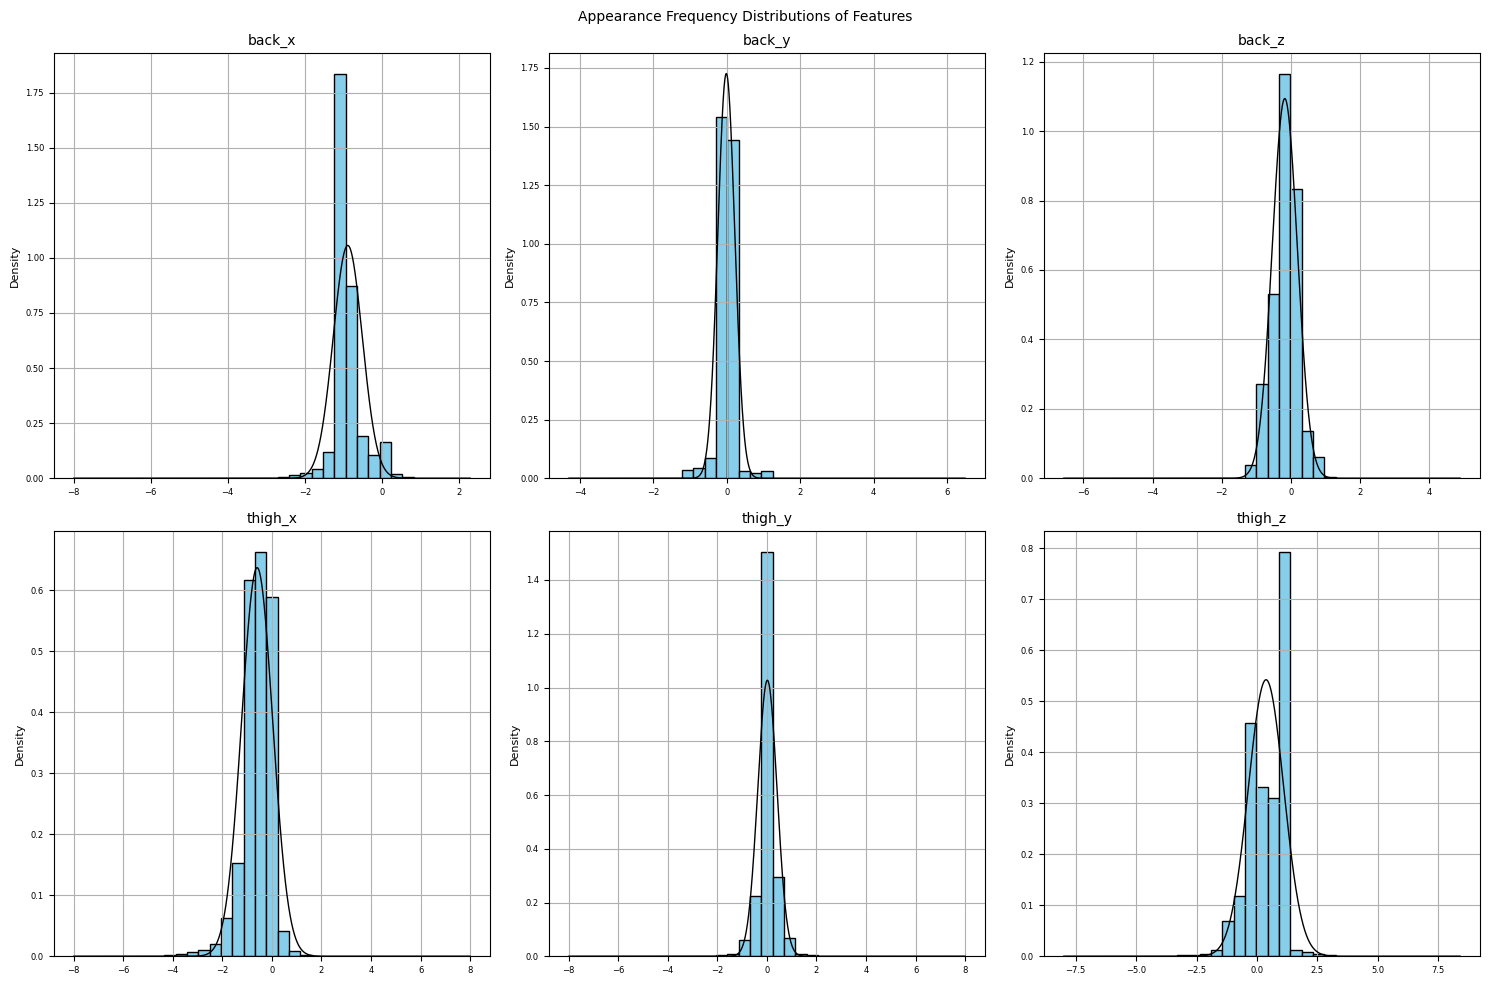

In [2]:
# Αναπαράσταση γραφικών της συχνότητας των τιμών για τις 6 στήλες
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Appearance Frequency Distributions of Features', fontsize=10)

for ax, column in zip(axes.flatten(), ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']):
    ax.hist(merged_df[column], bins=35, color='skyblue', edgecolor='black', density=True)
    ax.set_title(f'{column}', fontsize=10)
    ax.set_ylabel('Density', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True)

    # Προσεγγίζουμε τη κατανομή συχνοτήτων με μια Κανονικη Κατανομή
    mu, sigma = merged_df[column].mean(), merged_df[column].std()
    xmin, xmax = merged_df[column].min(), merged_df[column].max()
    x = np.linspace(xmin, xmax, 50000)
    p = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    ax.plot(x, p, 'k', linewidth=1)

plt.tight_layout()
plt.show()

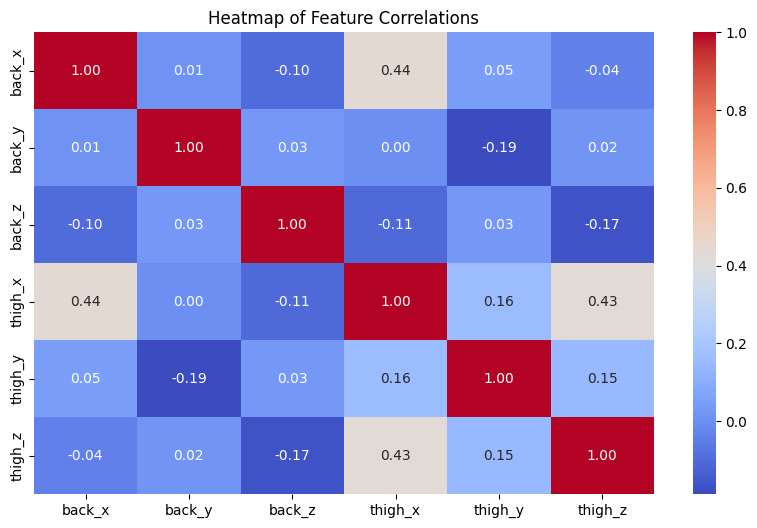

In [3]:
# Δημιουργία του heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df[['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Feature Correlations')
plt.show()

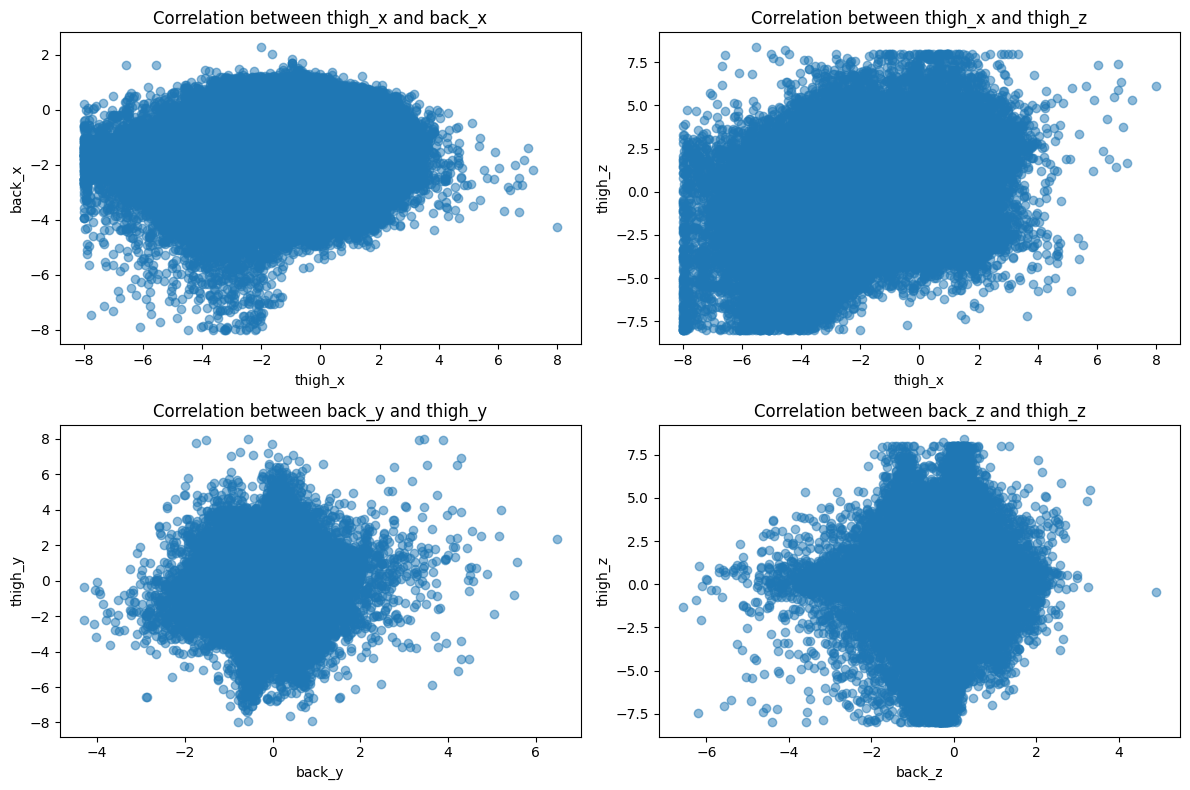

In [4]:
# Γραφική αναπαράσταση των 4 ζευγαριών από features με τις μεγαλύτερες ετεροσυσχετίσεις
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Ζευγάρι 1: thigh_x και back_x
axs[0, 0].scatter(merged_df['thigh_x'], merged_df['back_x'], alpha=0.5)
axs[0, 0].set_xlabel('thigh_x')
axs[0, 0].set_ylabel('back_x')
axs[0, 0].set_title('Correlation between thigh_x and back_x')

# Ζευγάρι 2: thigh_x και thigh_z
axs[0, 1].scatter(merged_df['thigh_x'], merged_df['thigh_z'], alpha=0.5)
axs[0, 1].set_xlabel('thigh_x')
axs[0, 1].set_ylabel('thigh_z')
axs[0, 1].set_title('Correlation between thigh_x and thigh_z')

# Ζευγάρι 3: back_y και thigh_y
axs[1, 0].scatter(merged_df['back_y'], merged_df['thigh_y'], alpha=0.5)
axs[1, 0].set_xlabel('back_y')
axs[1, 0].set_ylabel('thigh_y')
axs[1, 0].set_title('Correlation between back_y and thigh_y')

# Ζευγάρι 4: back_z και thigh_z
axs[1, 1].scatter(merged_df['back_z'], merged_df['thigh_z'], alpha=0.5)
axs[1, 1].set_xlabel('back_z')
axs[1, 1].set_ylabel('thigh_z')
axs[1, 1].set_title('Correlation between back_z and thigh_z')

plt.tight_layout()
plt.show()

**Στατιστική Επεξεργασία ανά Συμμετέχοντα**

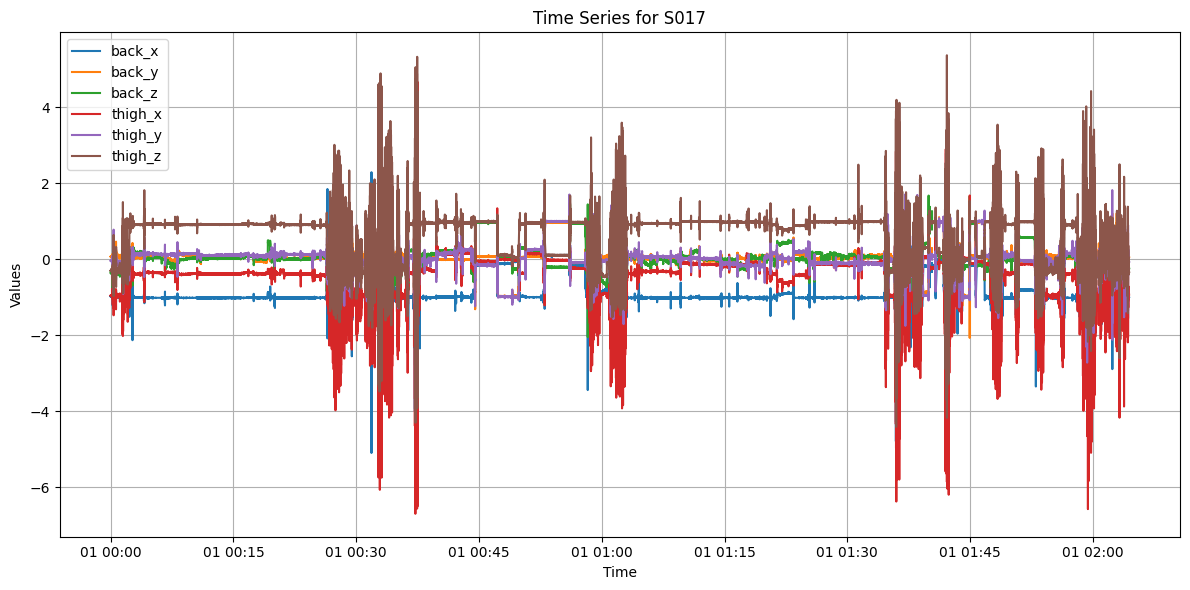

<ipython-input-1-6c436483d67e>:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


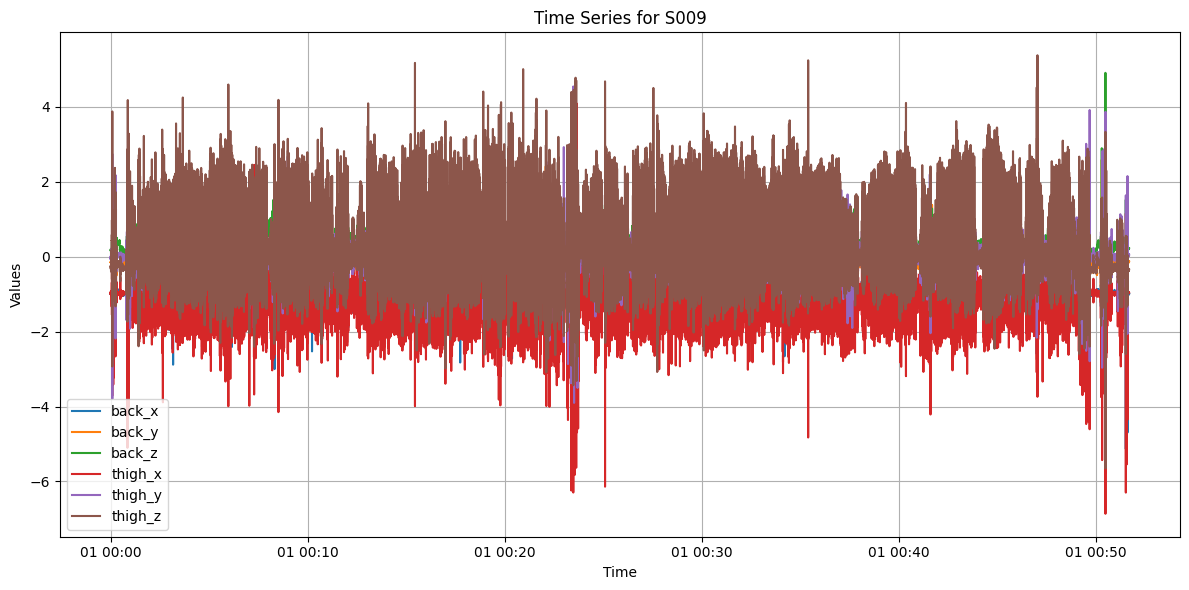

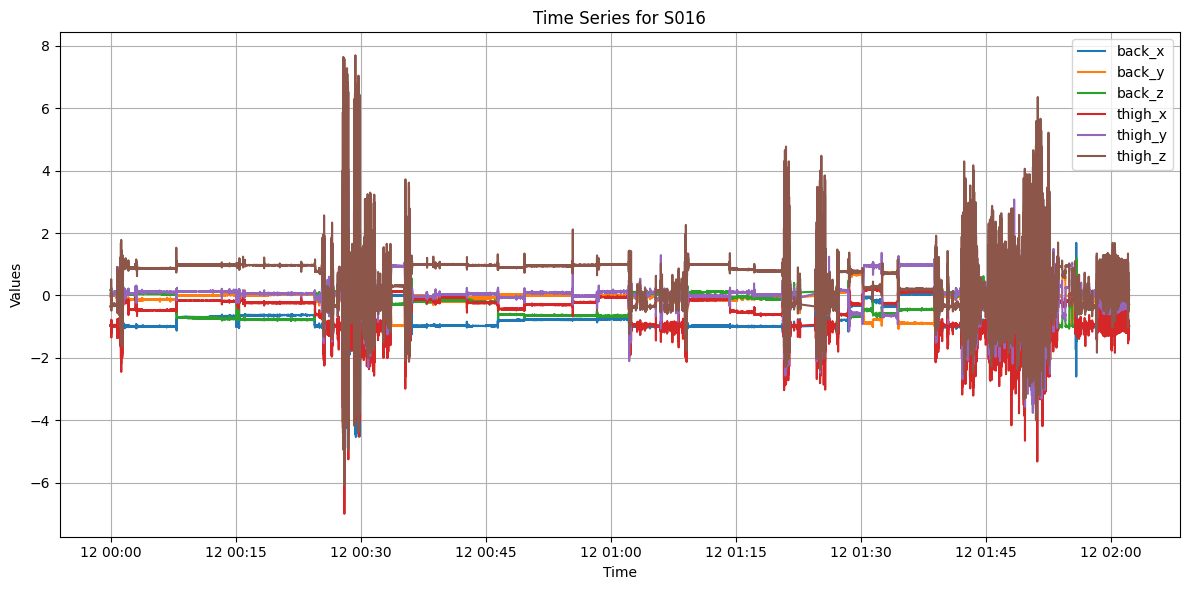

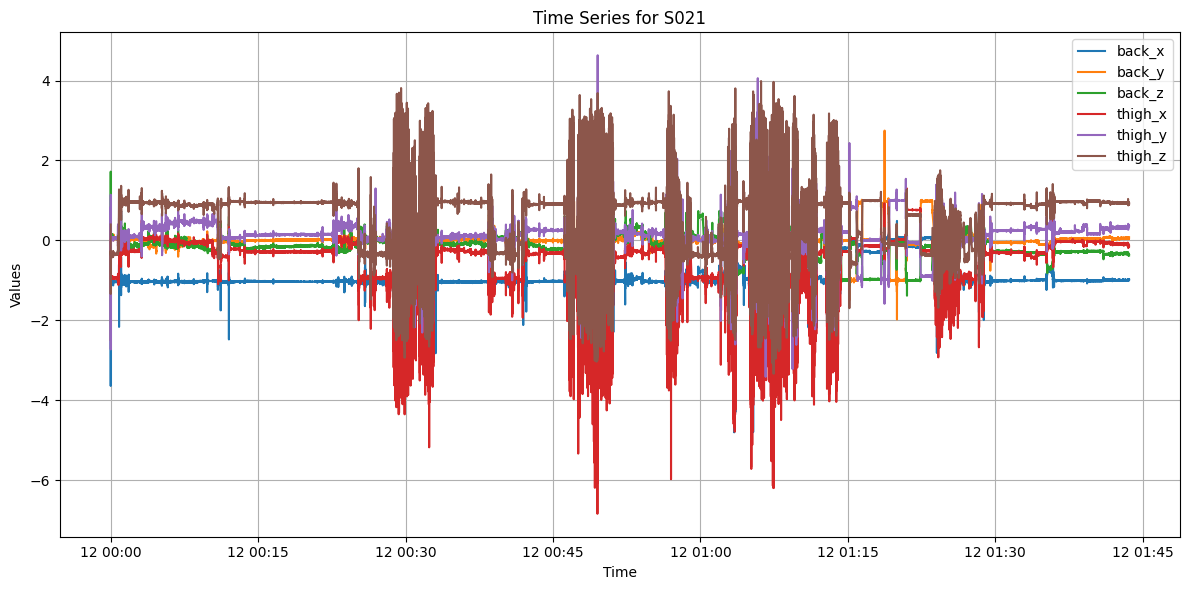

<ipython-input-1-6c436483d67e>:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


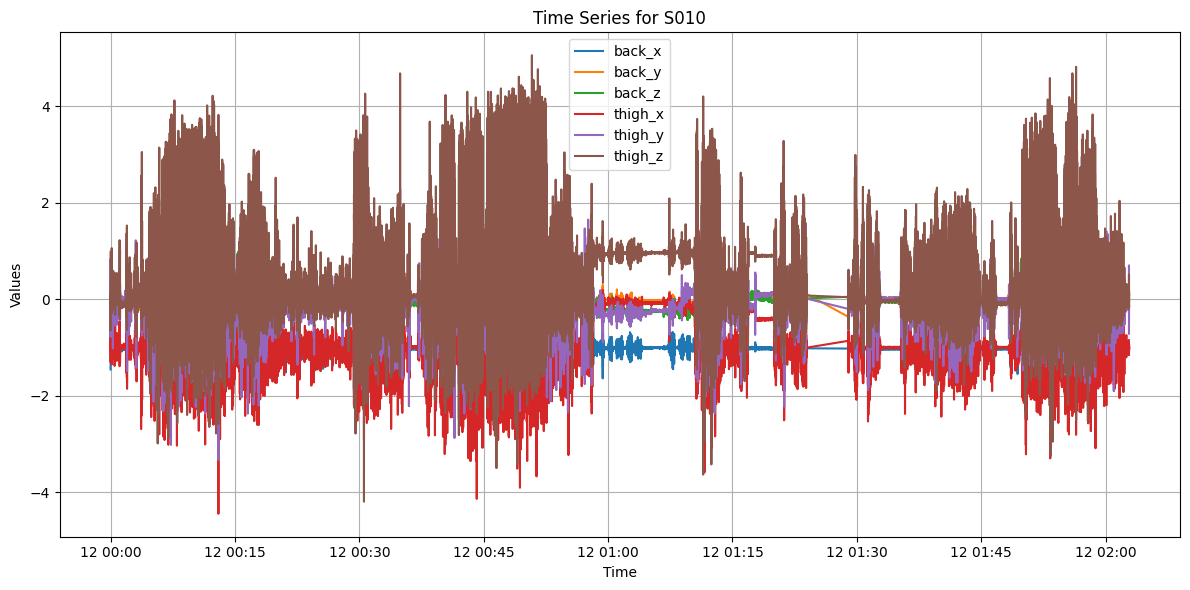

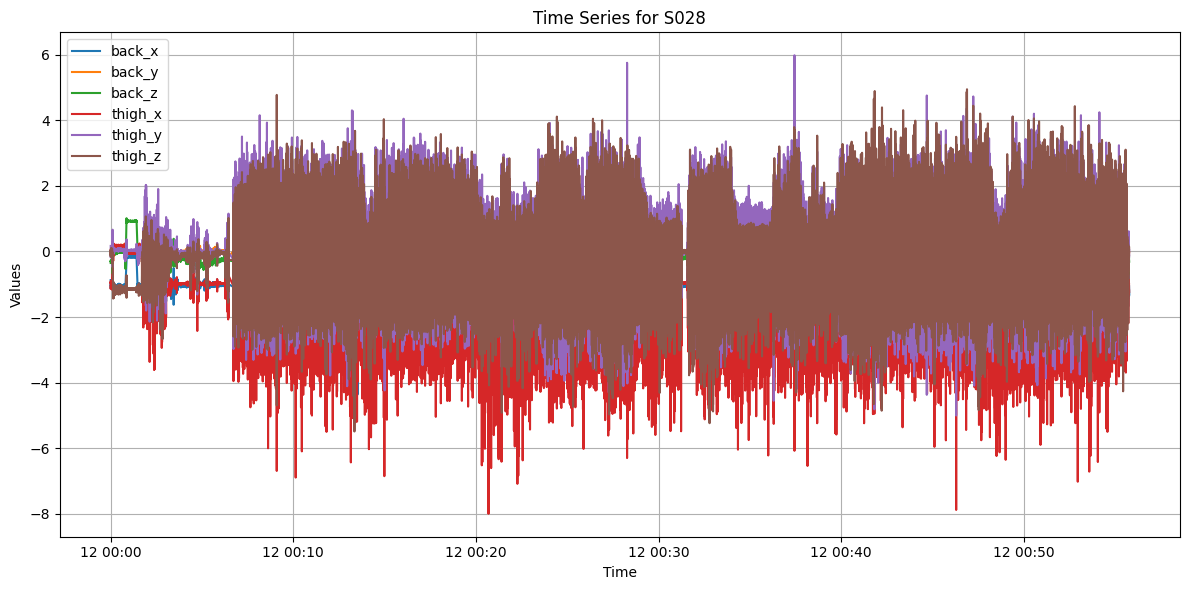

<ipython-input-1-6c436483d67e>:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


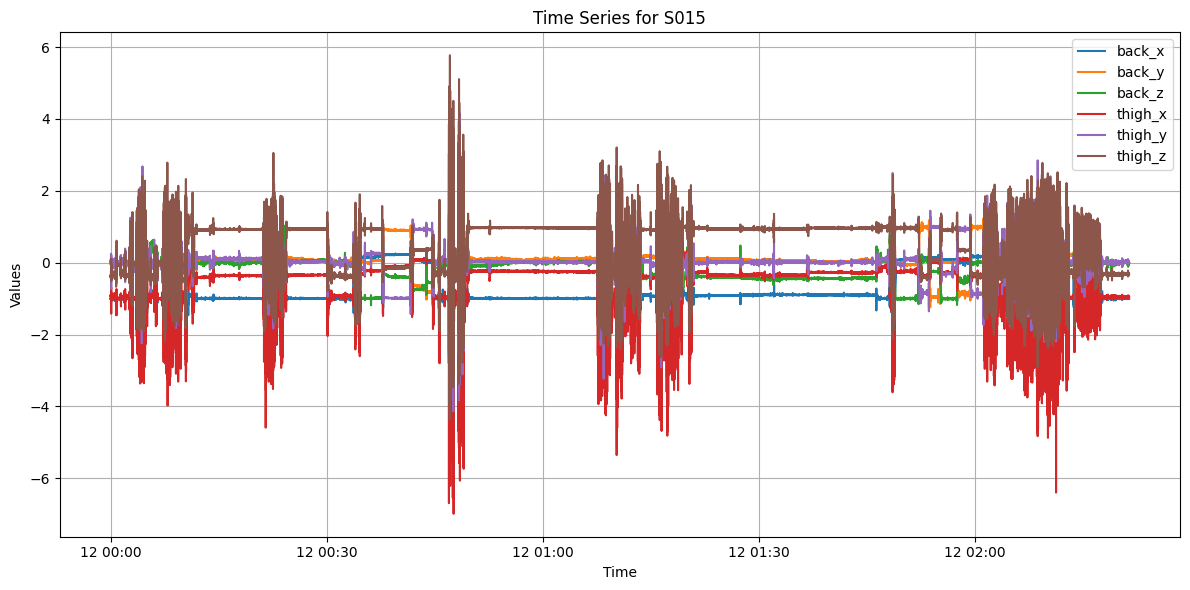

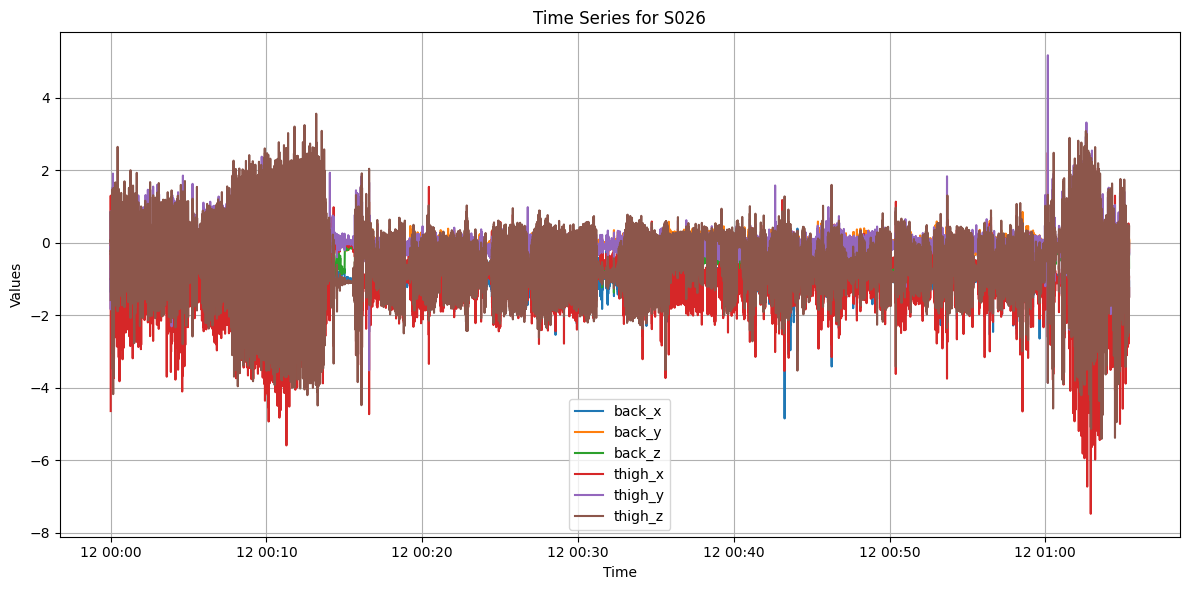

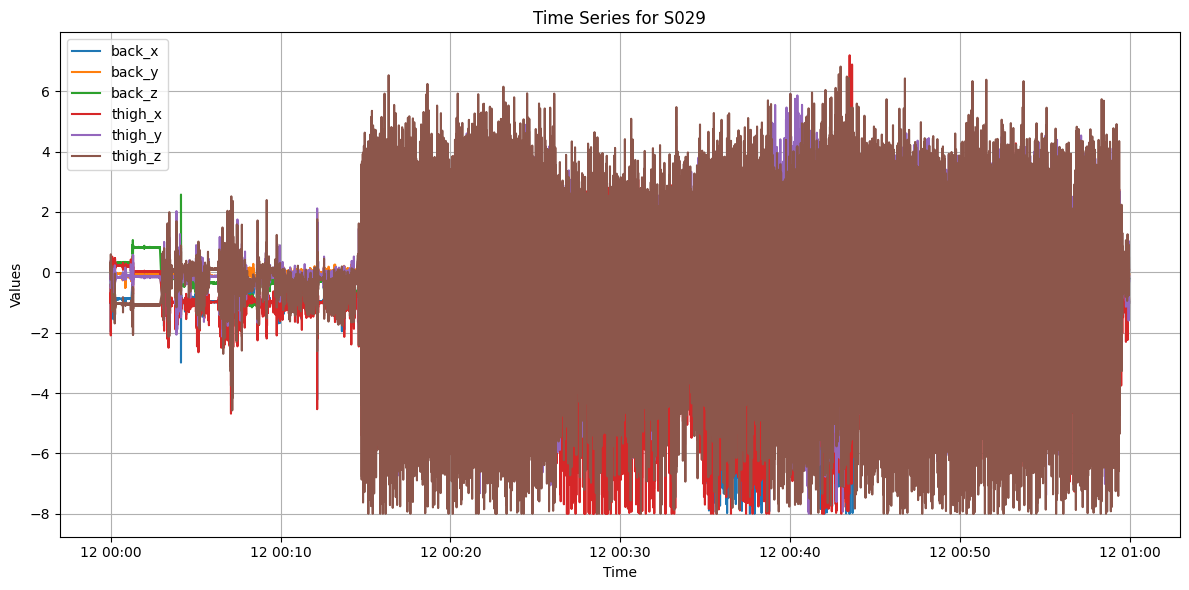

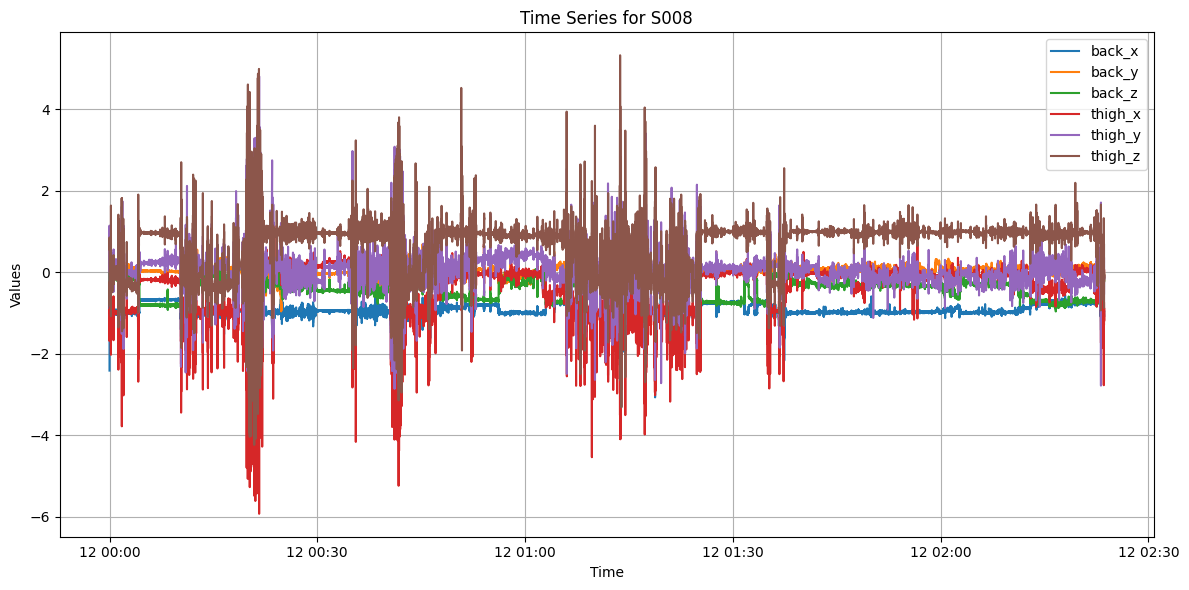

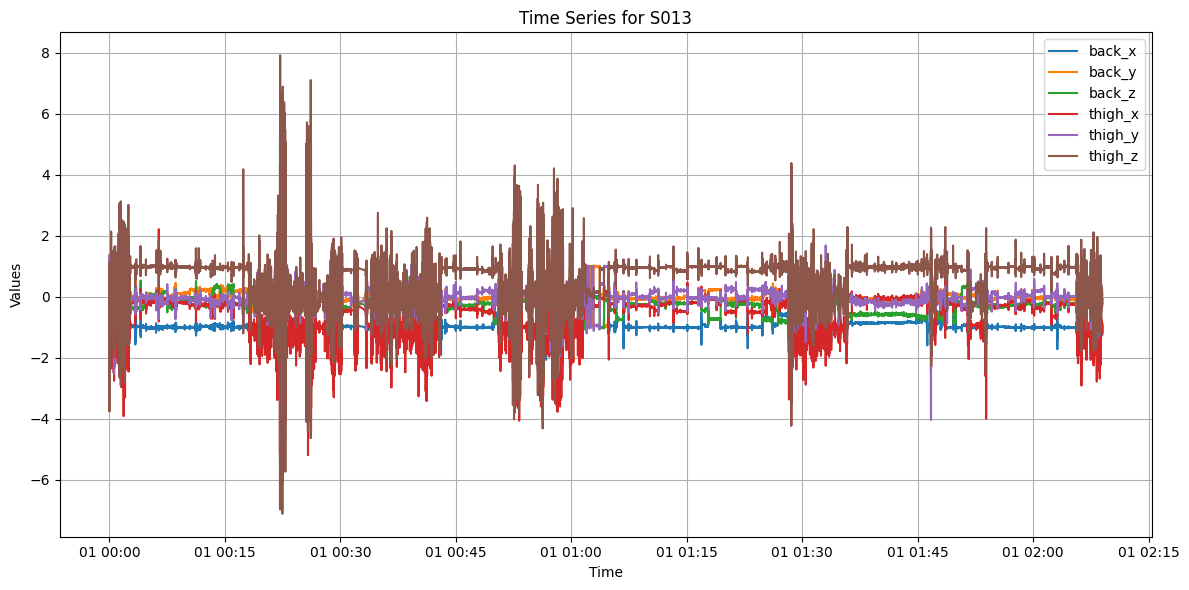

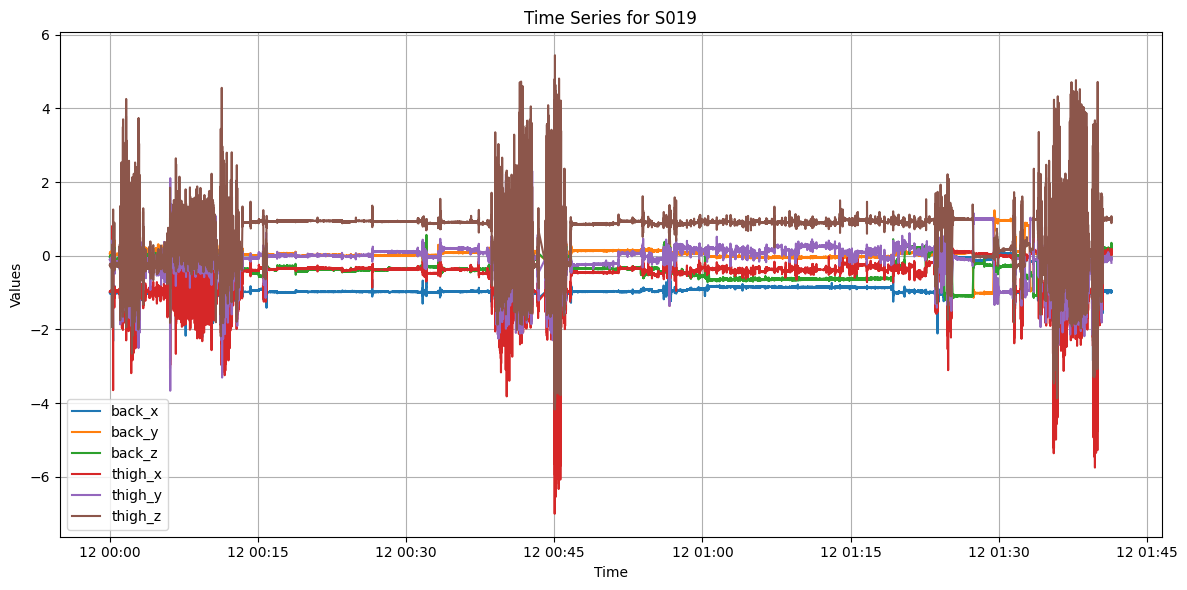

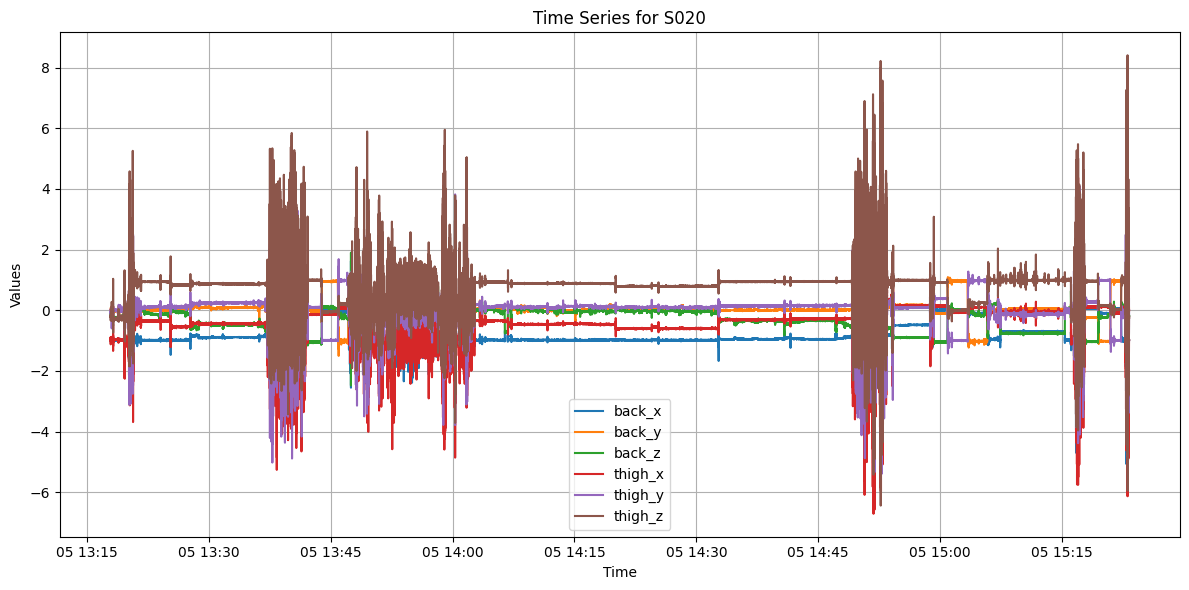

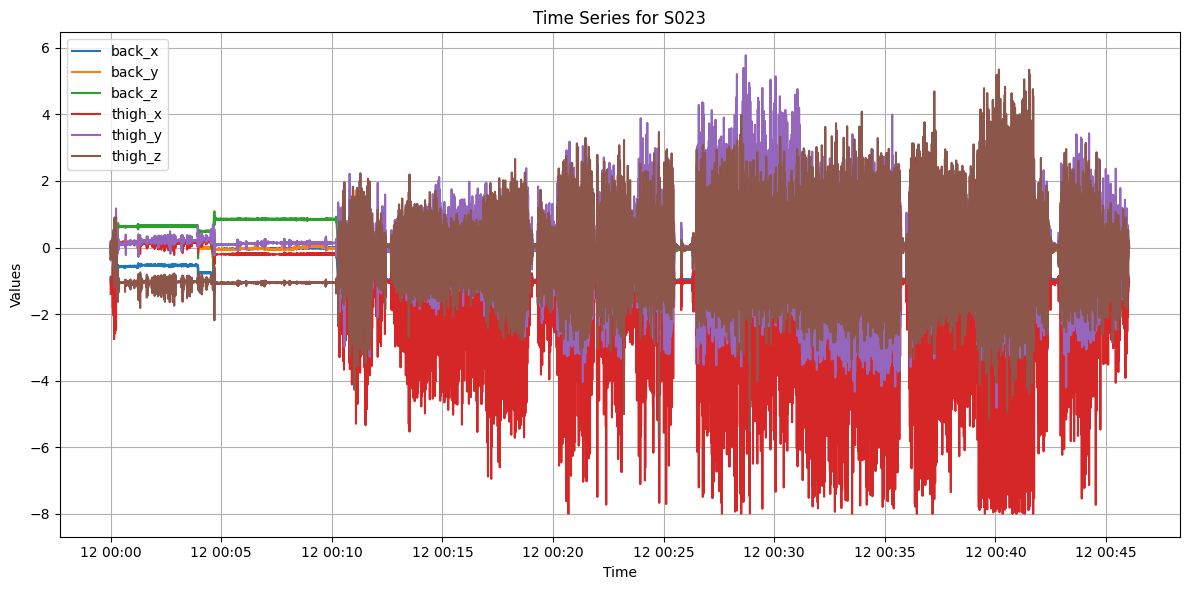

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


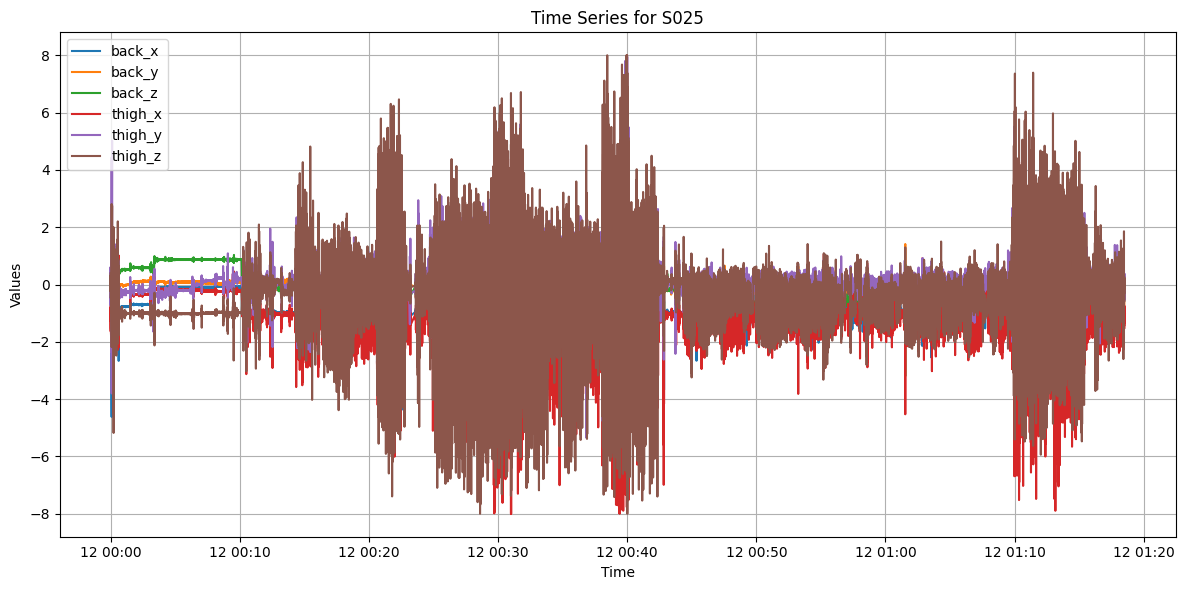

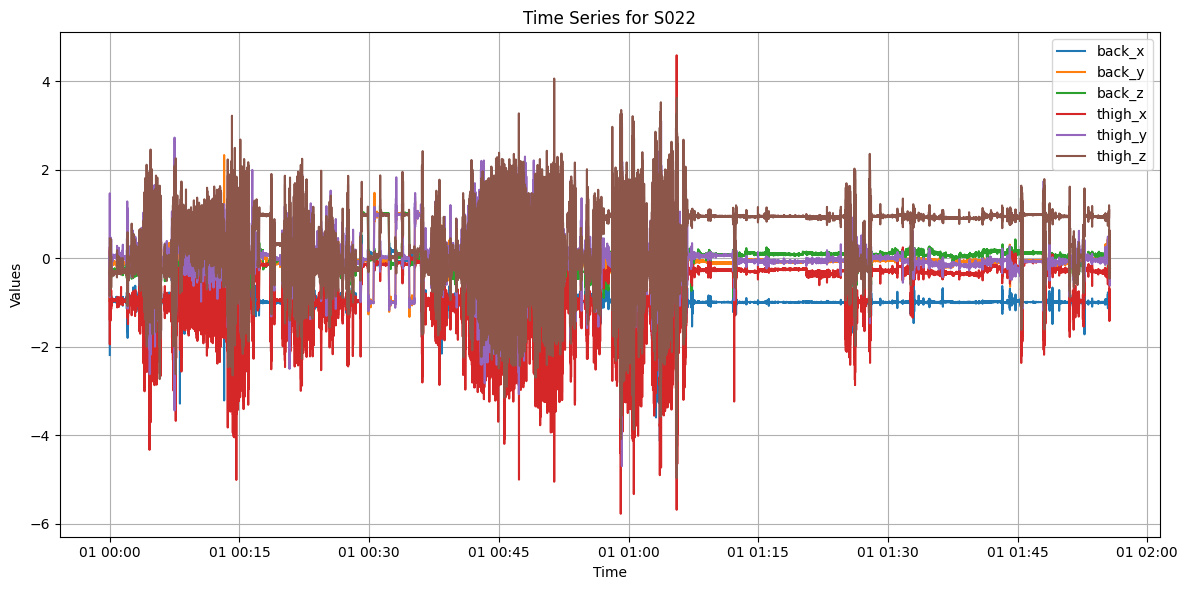

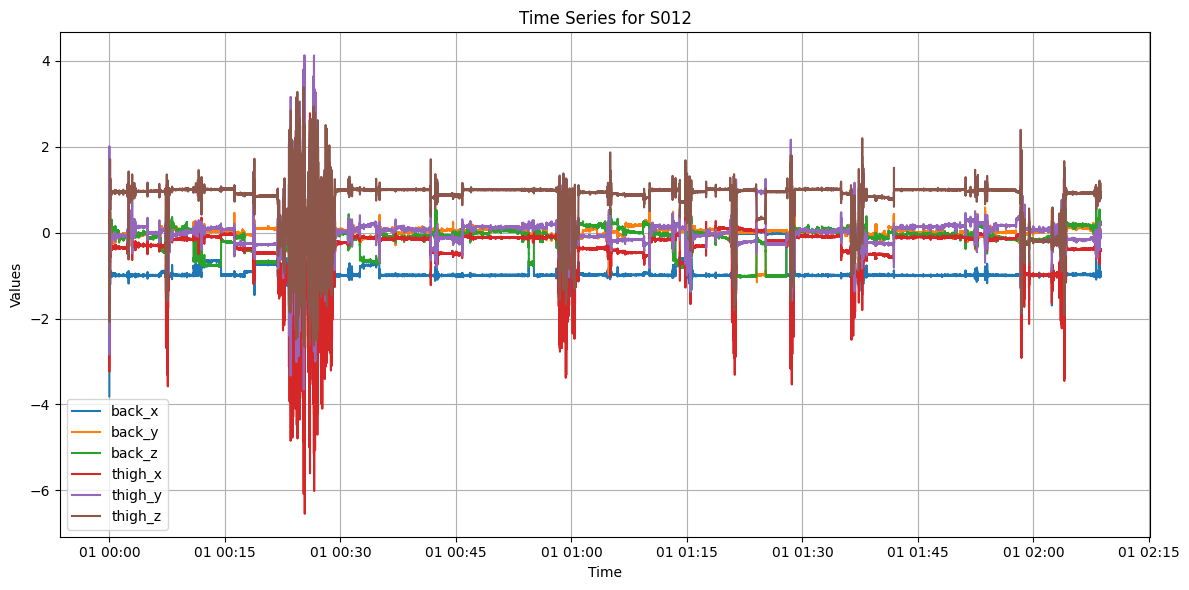

<ipython-input-1-6c436483d67e>:38: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


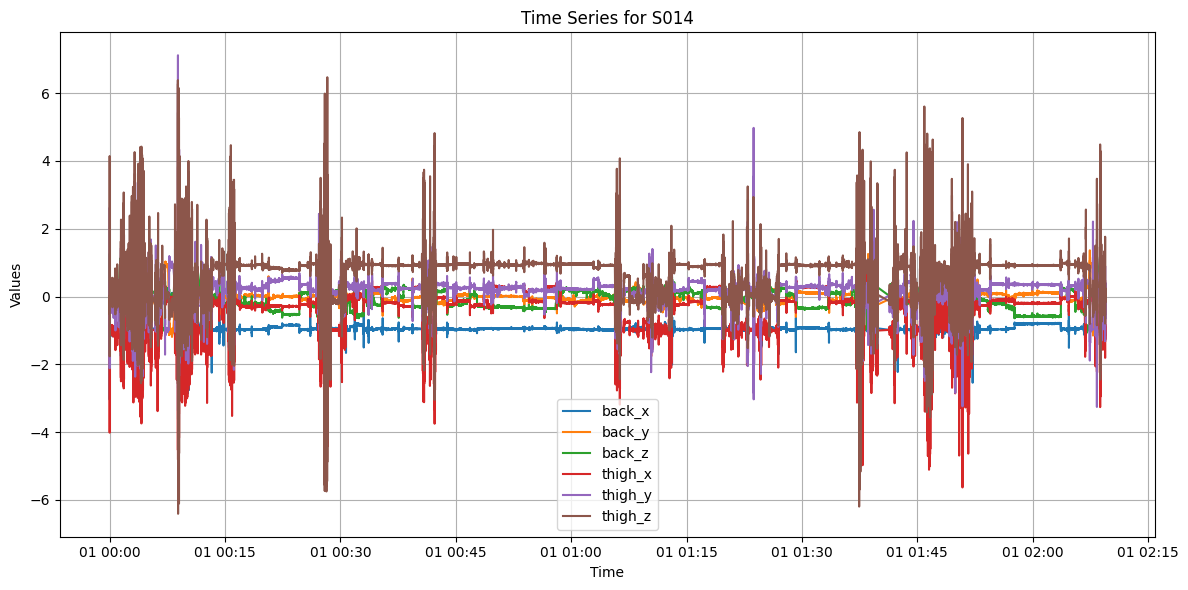

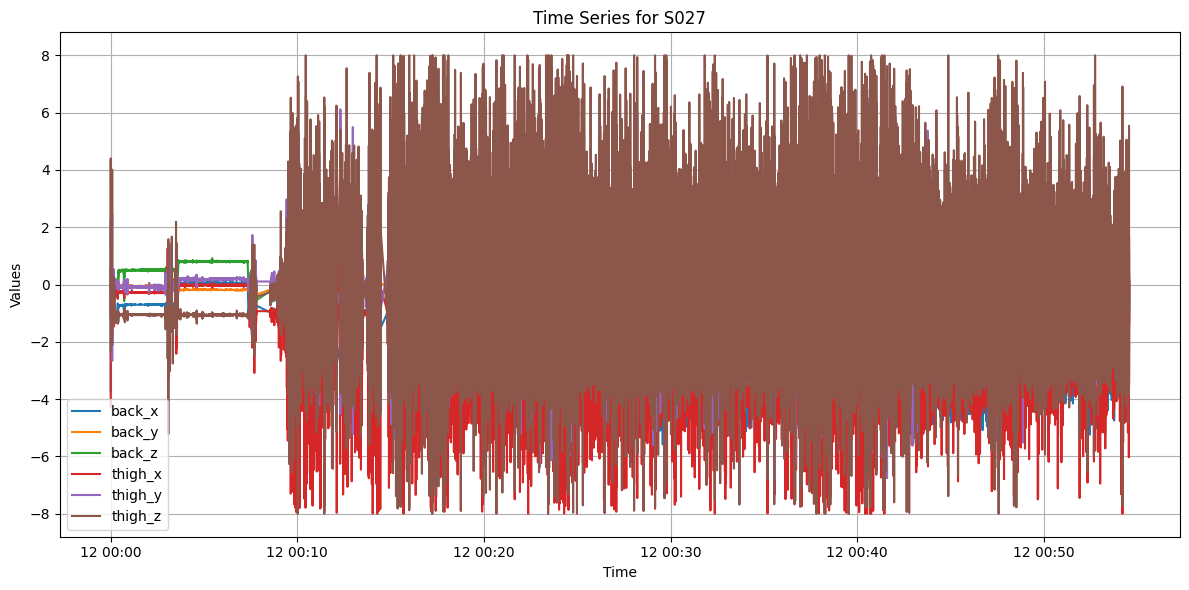

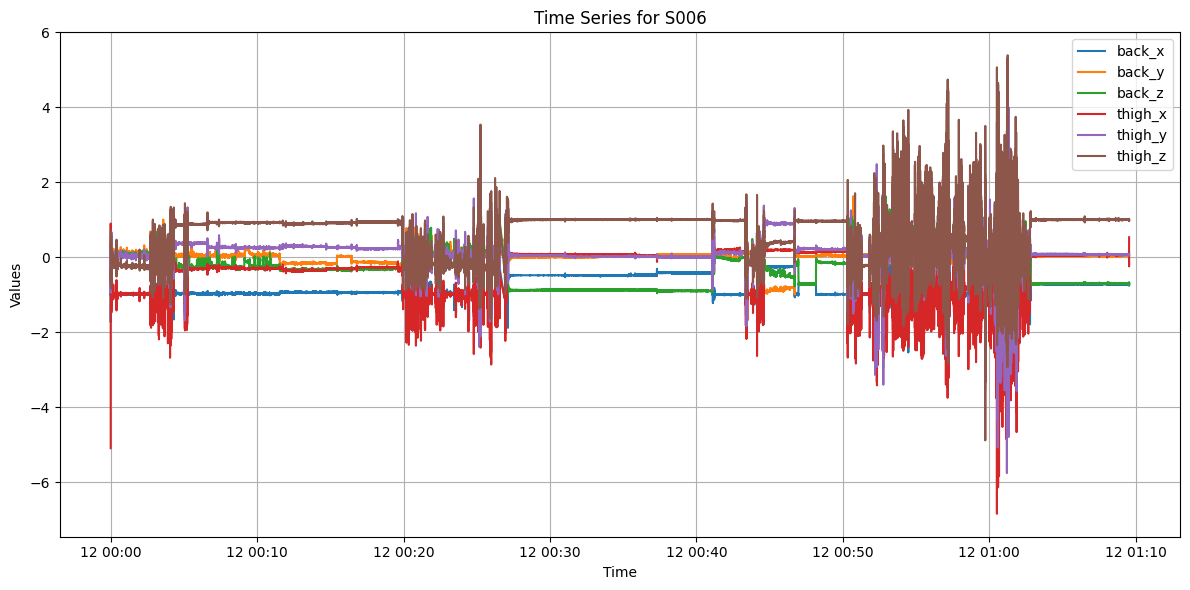

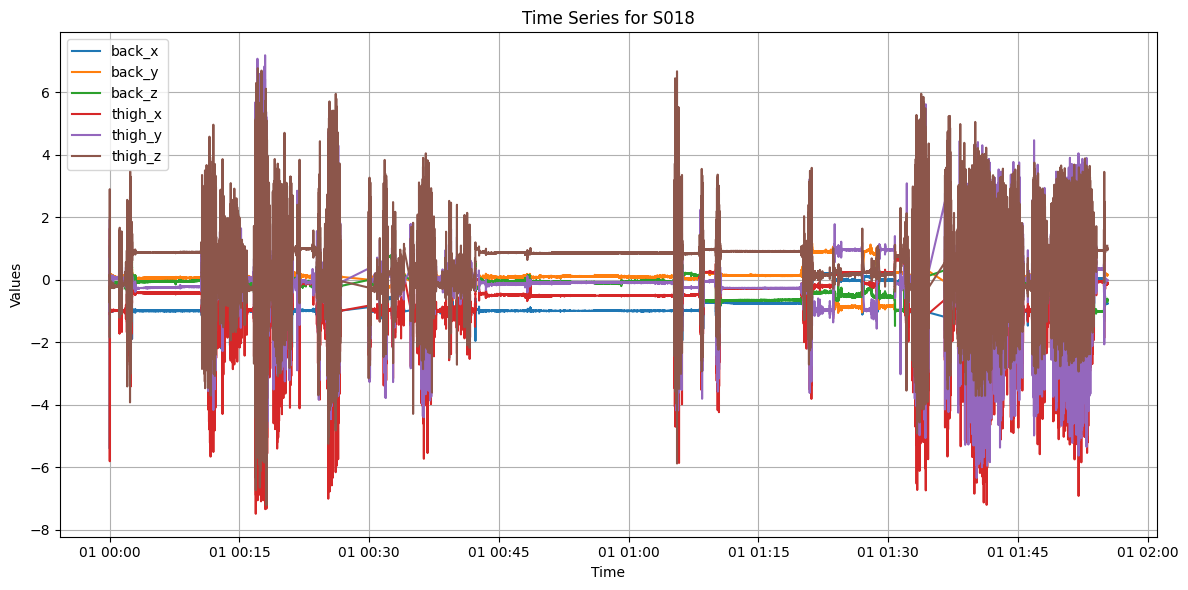

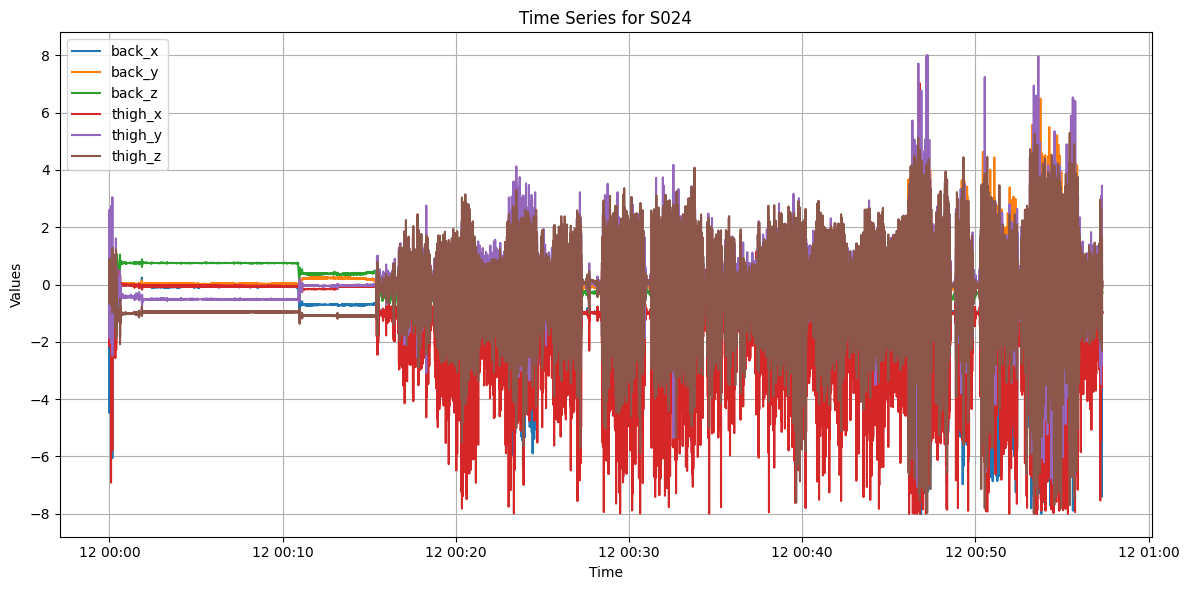

In [ ]:
# Λίστα για τα ονόματα των συμμετεχόντων
file_names = []

# Σχεδιάζουμε τη χρονοσειρά για κάθε αρχείο CSV
for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    df = pd.read_csv(file_path)
    # Χωρίς κατάληξη
    base_name = os.path.splitext(filename)[0]

    # Μετατροπή του timestamp σε datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Δημιουργία γραφήματος για τα γνωρίσματα
    plt.figure(figsize=(12, 6))

    # Σχεδιάζουμε τη χρονοσειρά για κάθε γνώρισμα
    for column in ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']:
        plt.plot(df['timestamp'], df[column], label=column)

    # Διαμόρφωση γραφήματος
    plt.title(f"Time Series for {base_name}")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Εμφάνιση γραφήματος
    plt.show()

In [9]:
# Πραγματοποίηση πέρασματος στο φάκελο για την εμφάνιση στατιστικών για κάθε αρχείο ξεχωριστά
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, filename))
        # Αφαίρεση της αχρείαστης στήλης 'label'
        df.drop(['label'], axis=1, inplace=True)
        # Χωρίς κατάληξη
        base_name = os.path.splitext(filename)[0]
        print(f"\n Statistic Values for Participant {base_name}")
        print(df.describe().T)


 Statistic Values for Participant S017
            count      mean       std       min       25%       50%       75%  \
back_x   366609.0 -0.877122  0.344197 -5.406958 -1.015725 -1.005594 -0.911785   
back_y   366609.0  0.044456  0.279297 -2.071573 -0.004517  0.043268  0.089068   
back_z   366609.0 -0.023970  0.334358 -3.055944 -0.231188  0.000020  0.079042   
thigh_x  366609.0 -0.442412  0.452621 -6.703075 -0.733601 -0.363347 -0.128969   
thigh_y  366609.0  0.017154  0.312487 -2.721946 -0.102230  0.030136  0.124147   
thigh_z  366609.0  0.575344  0.557854 -4.416835  0.095589  0.917147  0.966812   

              max  
back_x   2.291708  
back_y   3.482324  
back_z   1.676596  
thigh_x  4.741718  
thigh_y  3.869824  
thigh_z  5.371230  

 Statistic Values for Participant S009
            count      mean       std       min       25%       50%       75%  \
back_x   154464.0 -0.944405  0.199062 -5.238408 -1.040717 -0.953725 -0.847938   
back_y   154464.0 -0.056068  0.169198 -2.691137 -0

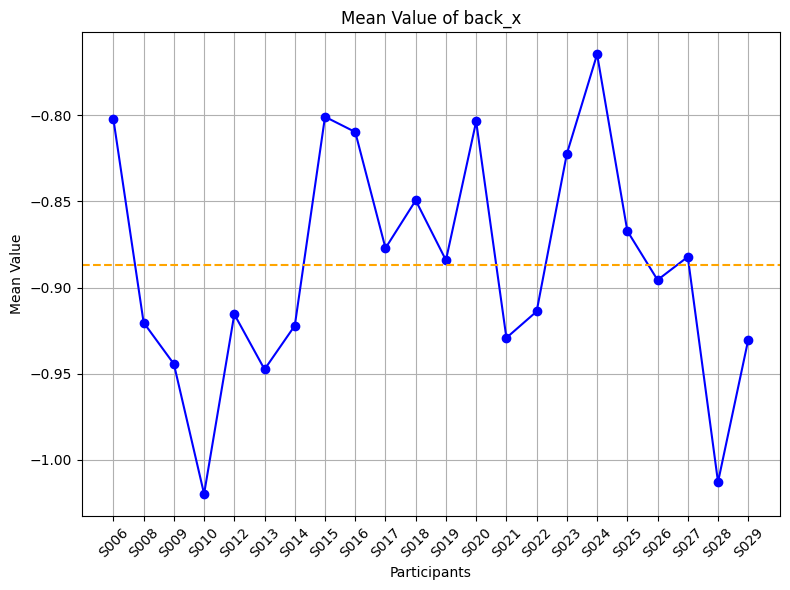

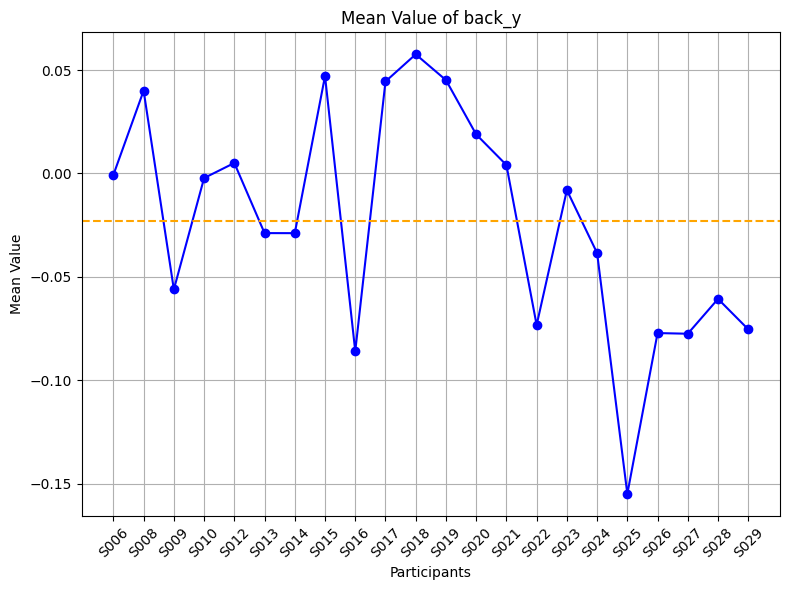

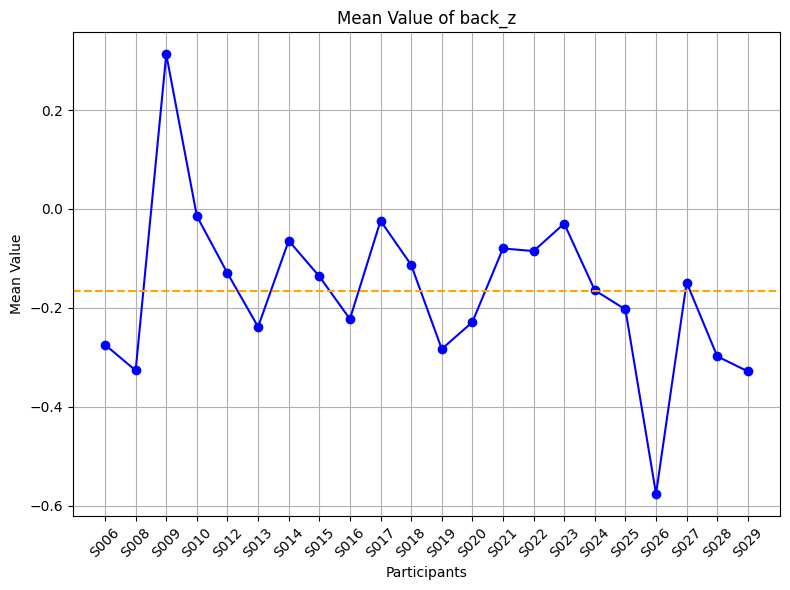

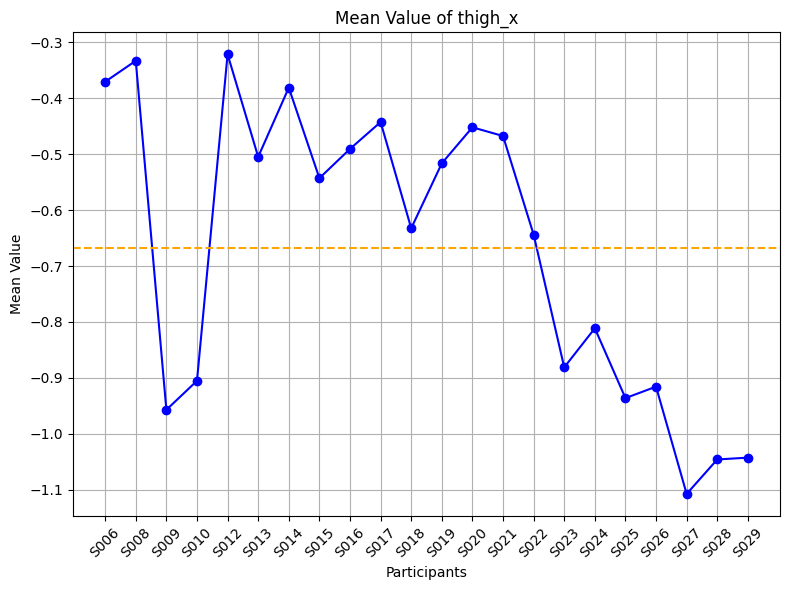

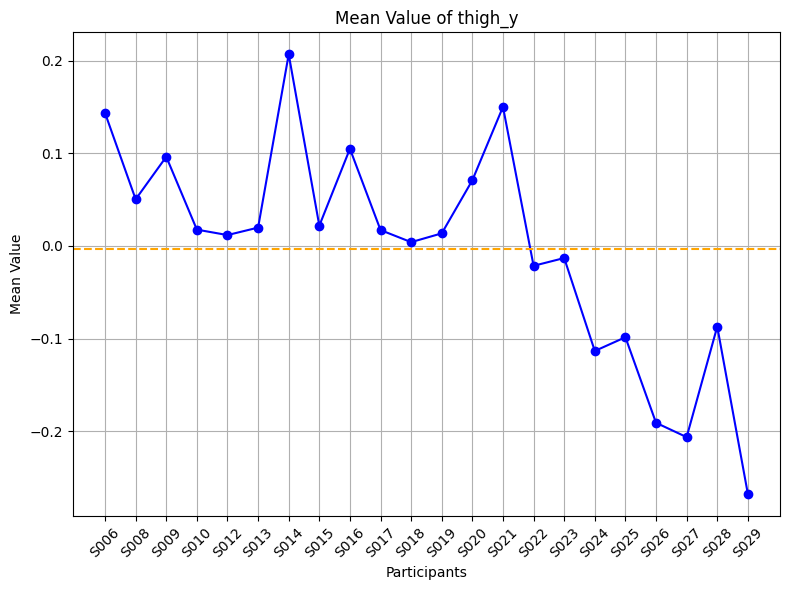

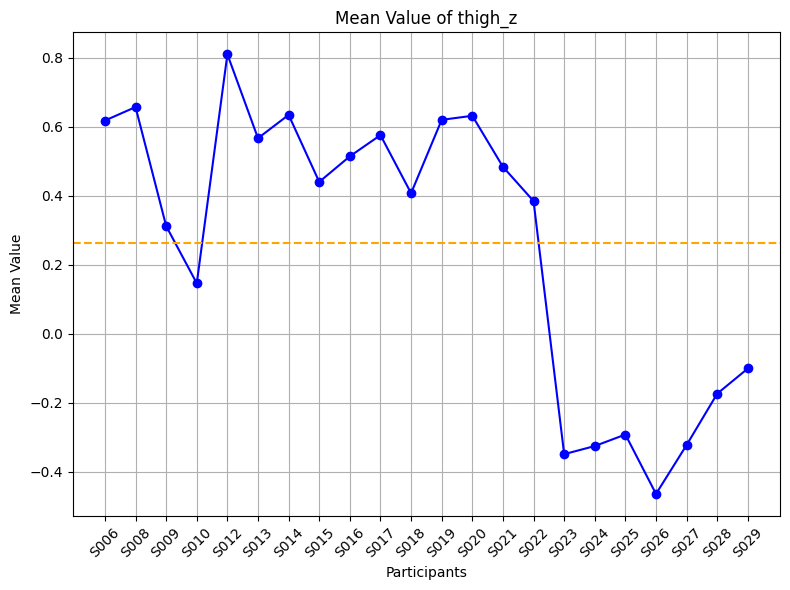

In [24]:
# Λίστα με τα ονόματα των συμμετεχόντων
file_names = []

# Λεξικό που θα διατηρεί τις μέσες τιμές των γνωρισμάτων ανά συμμετέχοντα
mean_values_per_file = {}

# Λίστα με τα features
features = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Χρώμα για τις τελείες και τις γραμμές
dot_color = 'blue'
line_color = 'red'

# Δημιουργούμε ένα γράφημα για κάθε γνώρισμα
for feature in features:
    plt.figure(figsize=(8, 6))  # Ορίζουμε το μέγεθος του γραφήματος

    # Πραγματοποιούμε πέρασμα σε όλα τα αρχεία CSV στο φάκελο
    for filename in os.listdir(path):
        if filename.endswith('.csv'):
            # Χωρίς κατάληξη
            base_name = os.path.splitext(filename)[0]
            file_names.append(base_name)
            df = pd.read_csv(os.path.join(path, filename))

            # Υπολογίζουμε τη μέση τιμή του γνωρίσματος για το συγκεκριμένο αρχείο
            mean_value = np.mean(df[feature])

            # Προσθέτουμε τη μέση τιμή στο λεξικό
            if base_name not in mean_values_per_file:
                mean_values_per_file[base_name] = {}
            mean_values_per_file[base_name][feature] = mean_value

    # Ταξινομούμε τα ονόματα των συμμετεχόντων για να διατηρήσουμε την ίδια σειρά στο γράφημα
    sorted_file_names = sorted(mean_values_per_file.keys())

    x_values = range(len(sorted_file_names))
    y_values = [mean_values_per_file[participant][feature] for participant in sorted_file_names]
    plt.plot(x_values, y_values, '-o', color=dot_color)

    # Υπολογίζουμε τη συνολική μέση τιμή του γνωρίσματος από όλα τα αρχεία
    total_mean_value = np.mean([mean_values_per_file[participant][feature] for participant in sorted_file_names])

    # Δημιουργούμε την οριζόντια γραμμή για την συνολική μέση τιμή
    plt.axhline(y=total_mean_value, color='orange', linestyle='--', label='Overall Mean')

    # Προσθέτουμε τίτλο και ετικέτες
    plt.title(f'Mean Value of {feature}')
    plt.xlabel('Participants')
    plt.ylabel('Mean Value')

    # Χρησιμοποιούμε τις ονομασίες των συμμετεχόντων ως ticks στον άξονα x
    plt.xticks(range(len(sorted_file_names)), sorted_file_names, rotation=45)

    # Προσθέτουμε το κάθετο διαγώνιο και εμφανίζουμε το γράφημα
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Στατιστική Επεξεργασία ανά Δραστηριότητα (label)**

In [38]:
# Λίστα με τα χαρακτηριστικά
features = ['back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

# Λίστα με τα labels
labels = [1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 130, 140]

# Δημιουργία λεξικού για τα DataFrames
dfs_per_label = {label: pd.DataFrame(columns=features) for label in labels}

# Πραγματοποιούμε πέρασμα σε όλα τα αρχεία CSV στο φάκελο
for filename in os.listdir(path):
    if filename.endswith('.csv'):
        df = pd.read_csv(os.path.join(path, filename))

        for label in labels:
            label_df = df[df['label'] == label]

            # Αν υπάρχουν δεδομένα για το συγκεκριμένο label, τα προσθέτουμε στο αντίστοιχο DataFrame
            if not label_df.empty:
                dfs_per_label[label] = pd.concat([dfs_per_label[label], label_df[features]], ignore_index=True)

# Τυπώνουμε τα στατιστικά για κάθε label
for label, df in dfs_per_label.items():
    print(f"Statistics for Label {label}:")
    print(df.describe().T)
    print("\n")

Statistics for Label 1:
             count      mean       std       min       25%       50%  \
back_x   1197155.0 -0.992566  0.311378 -7.974365 -1.158848 -0.975721   
back_y   1197155.0 -0.038755  0.190476 -3.016498 -0.141057 -0.030273   
back_z   1197155.0 -0.137808  0.287737 -3.827393 -0.278809 -0.127185   
thigh_x  1197155.0 -1.056683  0.639900 -8.000000 -1.314697 -0.994395   
thigh_y  1197155.0 -0.023477  0.536738 -7.997314 -0.200704 -0.000487   
thigh_z  1197155.0 -0.074345  0.721997 -8.000000 -0.372559 -0.095456   

              75%       max  
back_x  -0.803997  2.291708  
back_y   0.070179  3.256592  
back_z   0.044074  2.896858  
thigh_x -0.808350  4.272705  
thigh_y  0.172181  5.979248  
thigh_z  0.216064  6.897688  


Statistics for Label 2:
            count      mean       std       min       25%       50%       75%  \
back_x   291356.0 -0.965280  1.113858 -8.000000 -1.871094 -0.858643  0.040771   
back_y   291356.0 -0.076626  0.407701 -4.307617 -0.278076 -0.070312  0.12

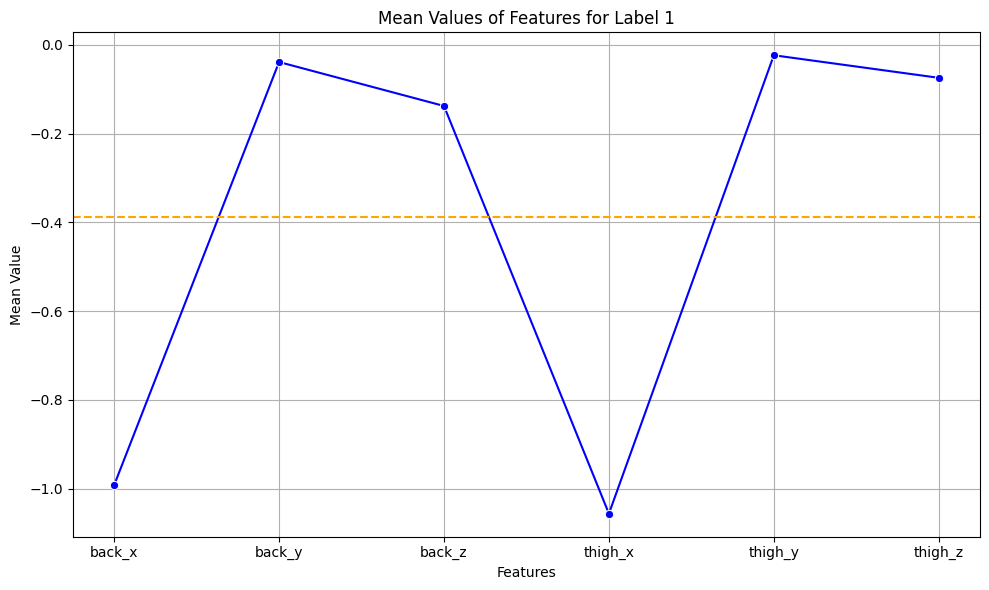

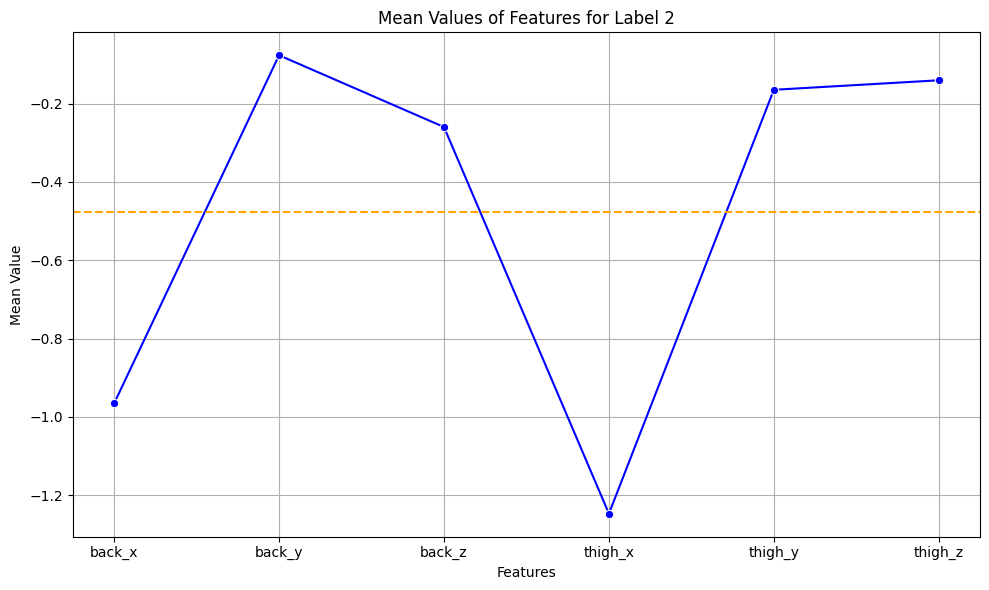

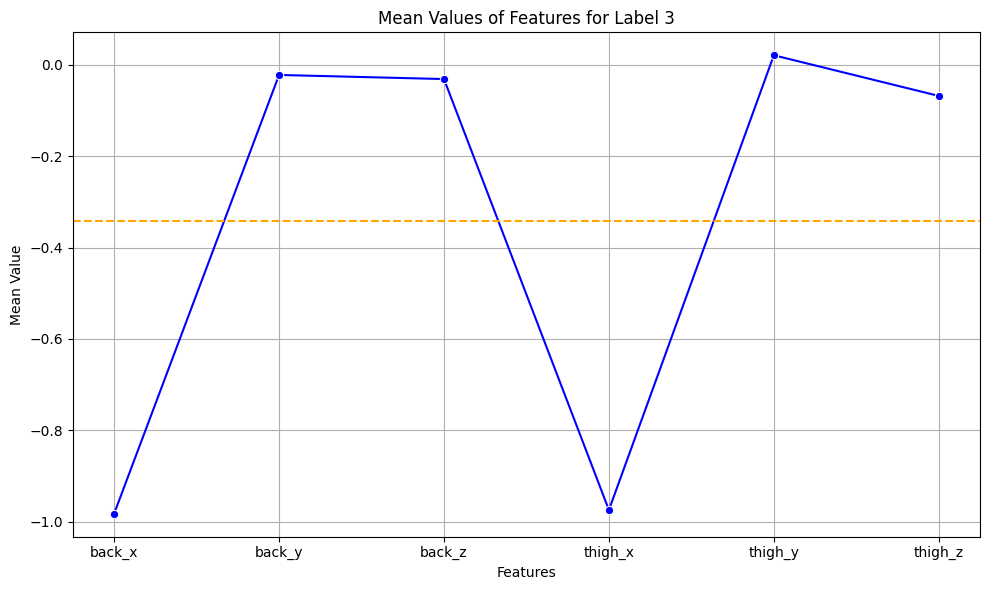

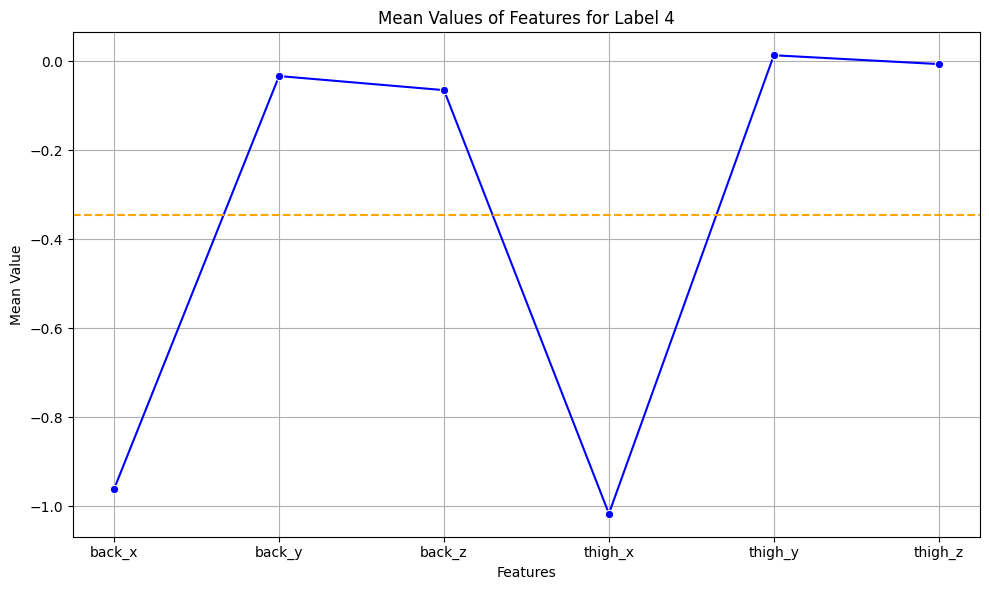

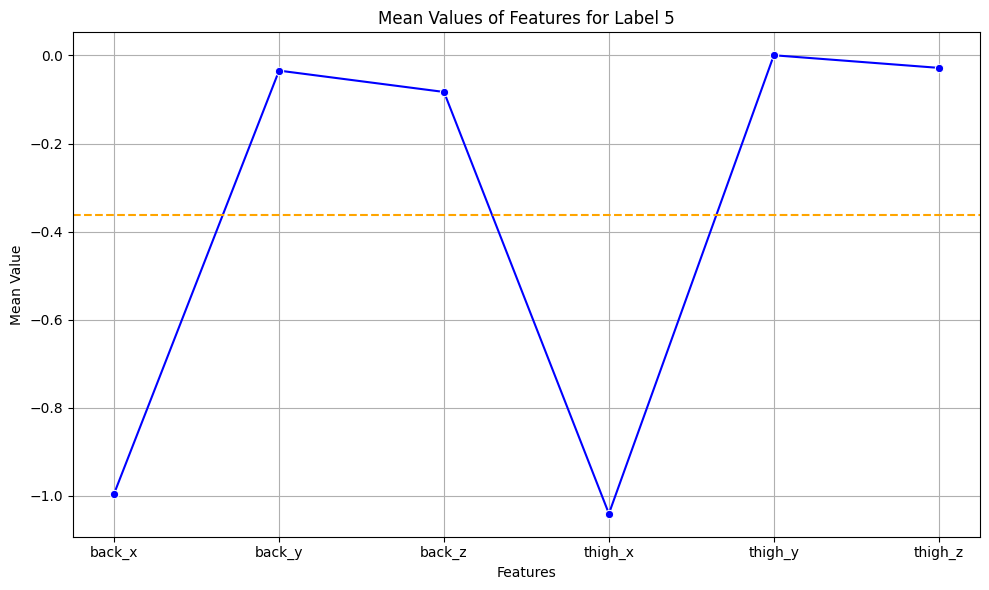

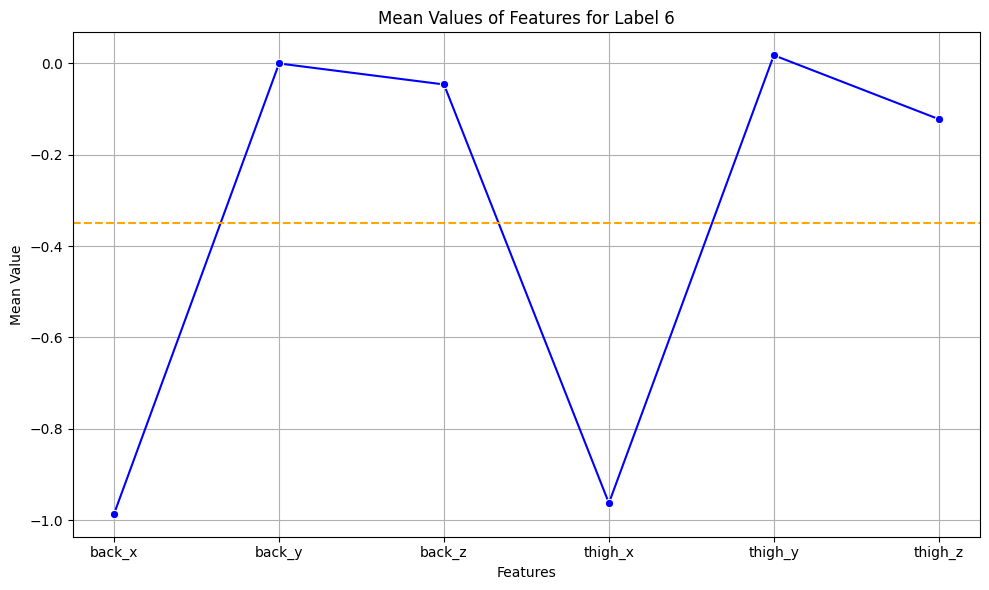

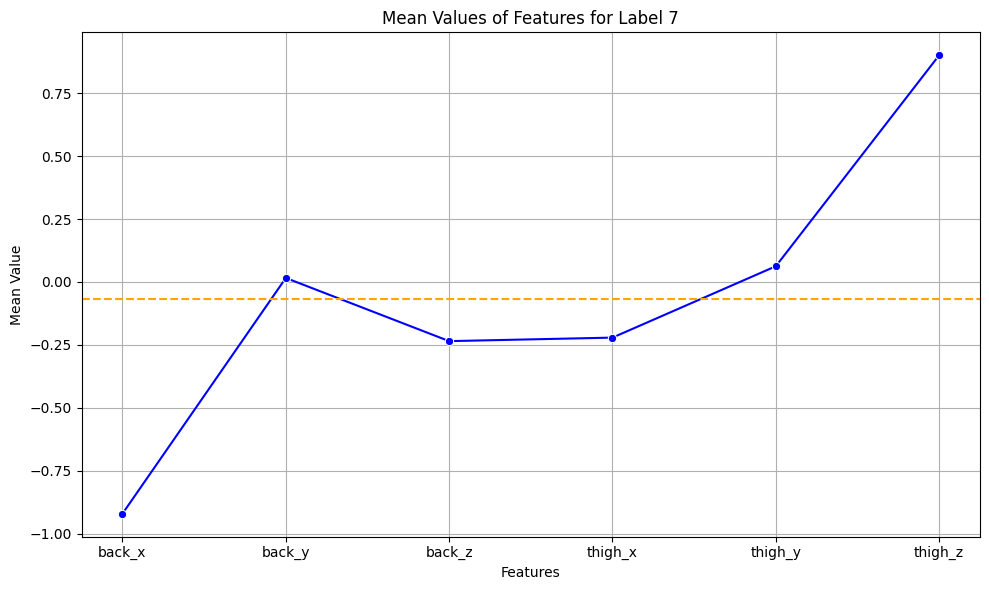

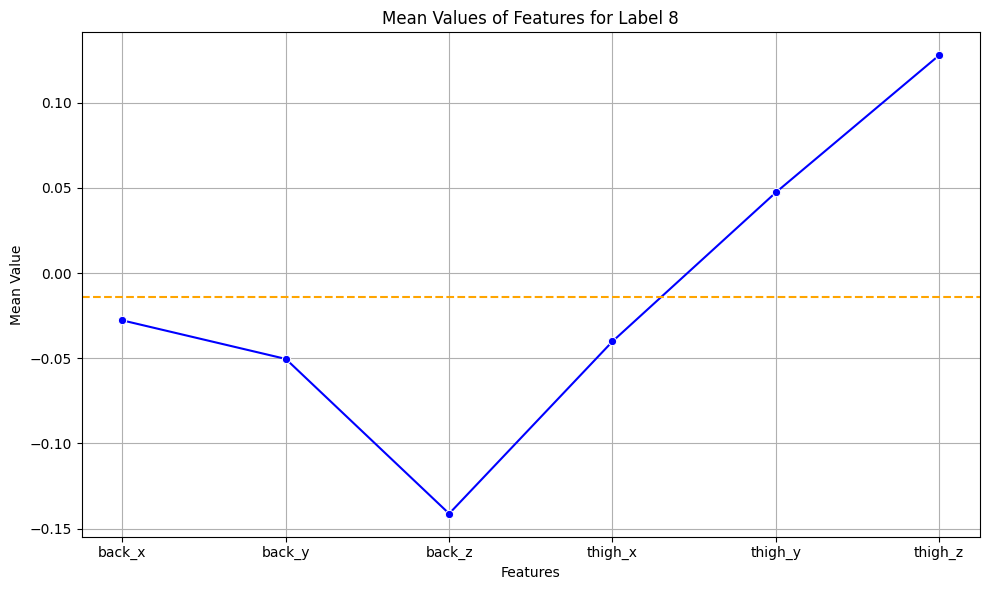

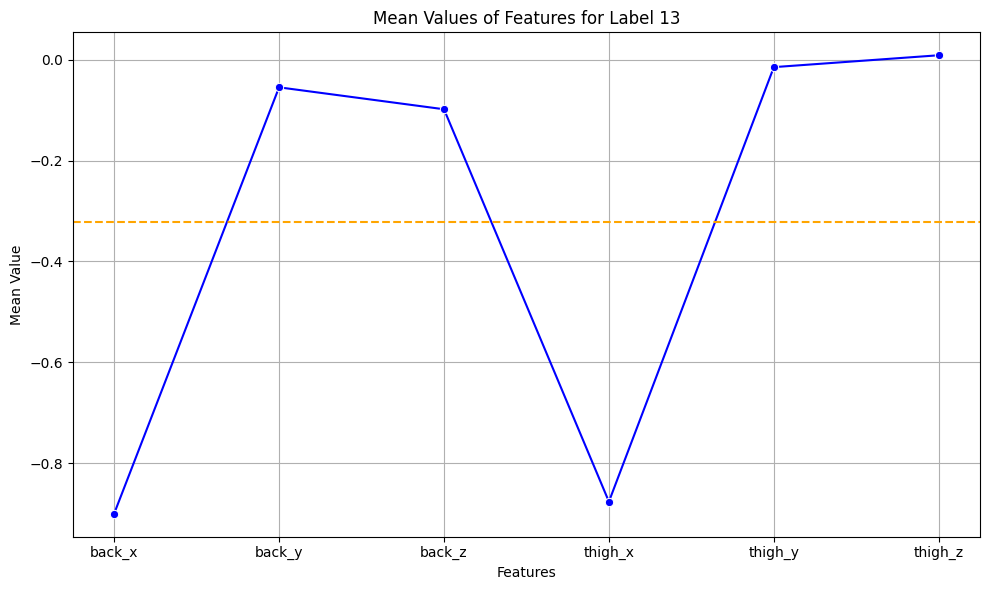

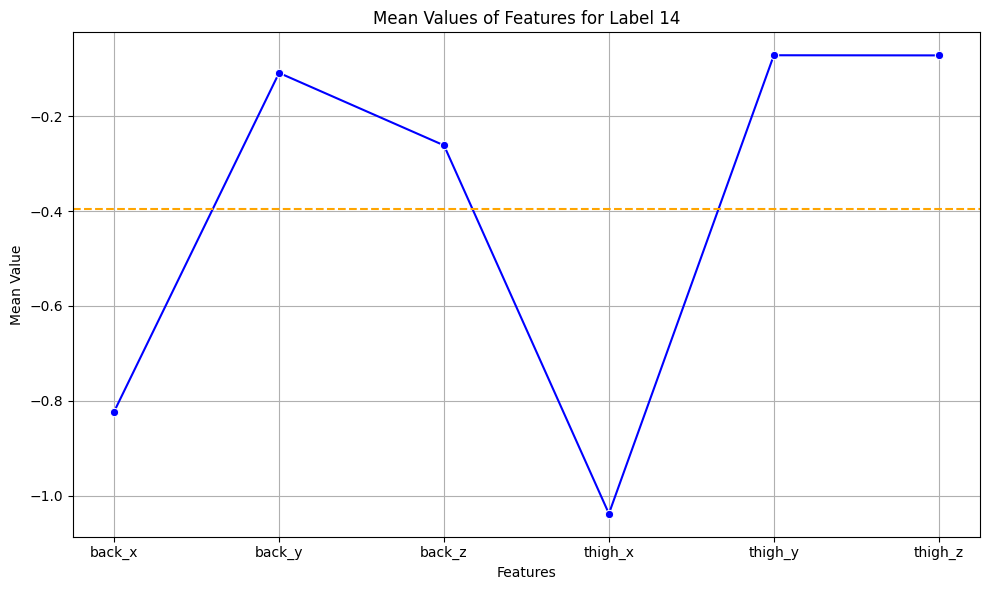

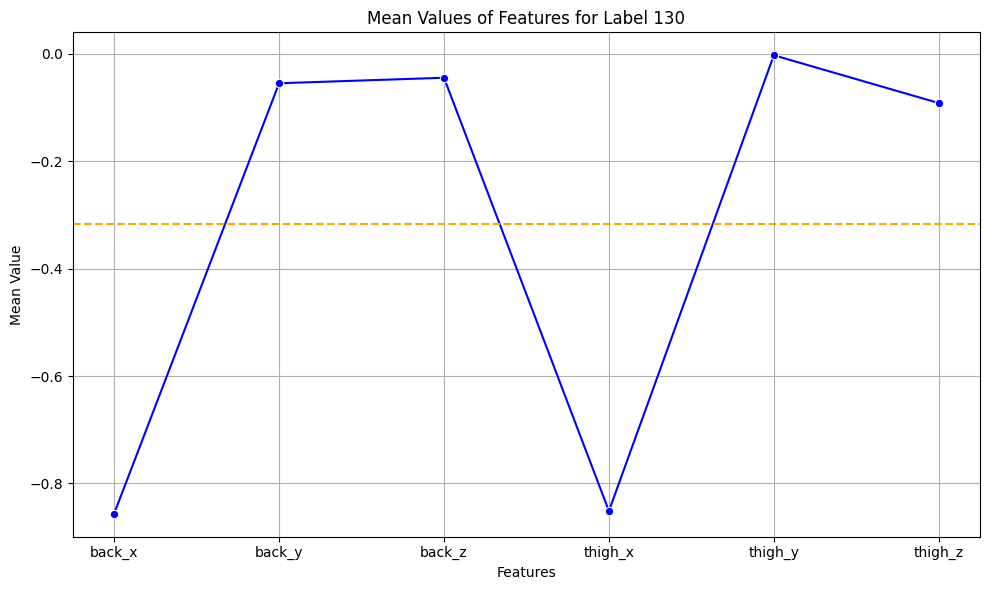

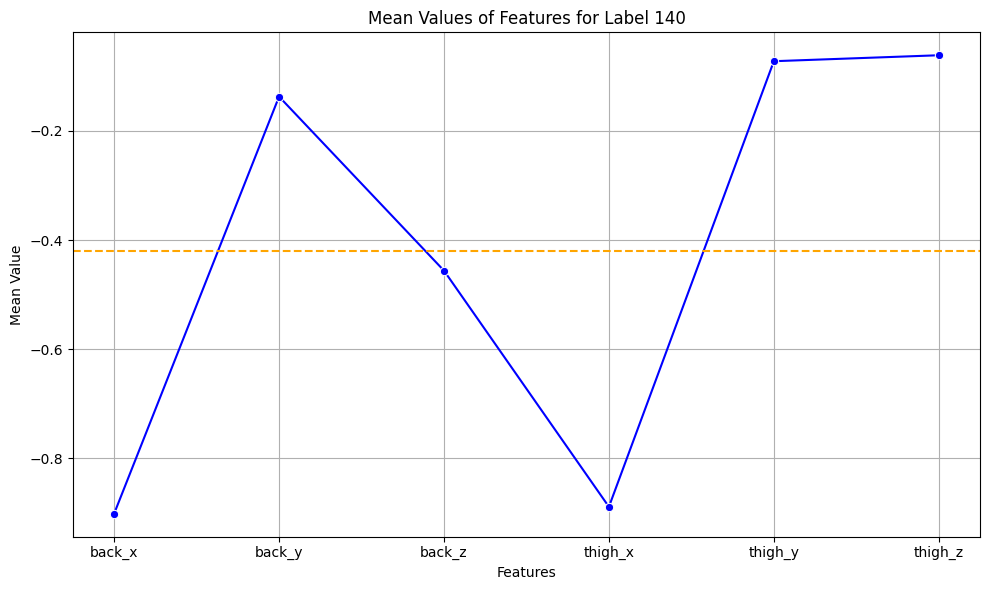

In [41]:
# Για κάθε label δημιουργούμε τα γραφήματα
for label, df in dfs_per_label.items():
     # Υπολογίζουμε τις μέσες τιμές για κάθε γνώρισμα
    mean_values = df.mean()

    # Υπολογίζουμε τη συνολική μέση τιμή
    overall_mean = mean_values.mean()

    # Δημιουργία γραφήματος
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=features, y=mean_values, color='blue', marker='o')
    plt.axhline(y=overall_mean, color='orange', linestyle='--', label='Overall Mean')

    # Προσθήκη τίτλου και ετικετών
    plt.title(f'Mean Values of Features for Label {label}')
    plt.xlabel('Features')
    plt.ylabel('Mean Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()